<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L10_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network Analysis Practice**

## **Data**
- Wikipedia 하이퍼링크 네트워크
 - 방향 그래프
 - 노드 수: 4,604
 - 간선 수: 119,882

- https://snap.stanford.edu/data/wikispeedia.html

```
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz
```



In [ ]:
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

In [ ]:
!head -n 20 wikispeedia_paths-and-graph/articles.tsv # nodes
!head -n 20 wikispeedia_paths-and-graph/links.tsv # edges

In [ ]:
from urllib.parse import unquote

unquote('%C3%81ed%C3%A1n_mac_Gabr%C3%A1in')

## **그래프 만들기**

In [6]:
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

for line in open('wikispeedia_paths-and-graph/articles.tsv', 'r'):
    line = line.strip()
    if line == "" or line[0] == '#':
        continue

    G.add_node(unquote(line))

for line in open('wikispeedia_paths-and-graph/links.tsv', 'r'):
    line = line.strip()
    if line == "" or line[0] == '#':
        continue

    u,v = line.split()
    u = unquote(u)
    v = unquote(v)

    G.add_edge(u, v)

In [ ]:
n_nodes = len(G.nodes) # node의 개수
n_edges = len(G.edges()) # edge의 개수

# density
density = nx.density(G)
density1 = n_edges / (n_nodes * (n_nodes-1))

# triangles
triangles = sum(nx.triangles(G.to_undirected()).values()) // 3


print('n_nodes:', n_nodes)
print('n_edges:', n_edges)
print('density:', density)
print('triangles:', triangles)

## **Centrality 계산**

In [ ]:
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G, 200)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())

print(degree)
print(indegree)
print(outdegree)
print(betweenness)
print(closeness)
print(pagerank)
print(clustering)
print(triangles)

# 더 큰 그래프로 가면 연산량이 너무 많고 python은 느리기 때문에 C++이나 Java를 사용함
# Java 라이브러리- neo4j를 사용하거나, 직접 구현

In [ ]:
print('Deg Rank')
for line in sorted(degree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nIn-Deg Rank')
for line in sorted(indegree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nOut-Deg Rank')
for line in sorted(outdegree.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nBetweenness Rank')
for line in sorted(betweenness.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nCloseness Rank')
for line in sorted(closeness.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nPageRank Rank')
for line in sorted(pagerank.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nClustering Rank')
for line in sorted(clustering.items(), key = lambda x:-x[1])[:10]:
    print(line)

print('\nTriangles Rank')
for line in sorted(triangles.items(), key = lambda x:-x[1])[:10]:
    print(line)

## **Centrality 사이의 관계 분석**
- 각 centrality 결과를 리스트 형식으로 변환

In [10]:
nodes = G.nodes()

deg_arr = [degree[node] for node in nodes]
indeg_arr = [indegree[node] for node in nodes]
outdeg_arr = [outdegree[node] for node in nodes]
betweenness_arr = [betweenness[node] for node in nodes]
closeness_arr = [closeness[node] for node in nodes]
pagerank_arr = [pagerank[node] for node in nodes]
clustering_arr = [clustering[node] for node in nodes]
triangles_arr = [triangles[node] for node in nodes]

In [ ]:
import matplotlib.pyplot as plt

labels = list(nodes)

for node in nodes:
    if indegree[node] > 0.25:
        for x, y, label in zip(indeg_arr, outdeg_arr, labels):
            plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', fontsize=3)

plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.title('Scatter Plot with Annotations')
plt.grid(True)

plt.scatter(indeg_arr, outdeg_arr, s=1, alpha=0.3)
plt.show()

In [12]:
for node in nodes:
    if indegree[node] > 0.2 and outdegree[node] < 0.03:
        print(node)

France


- Seaborn을 사용하여 간단하게 그리기

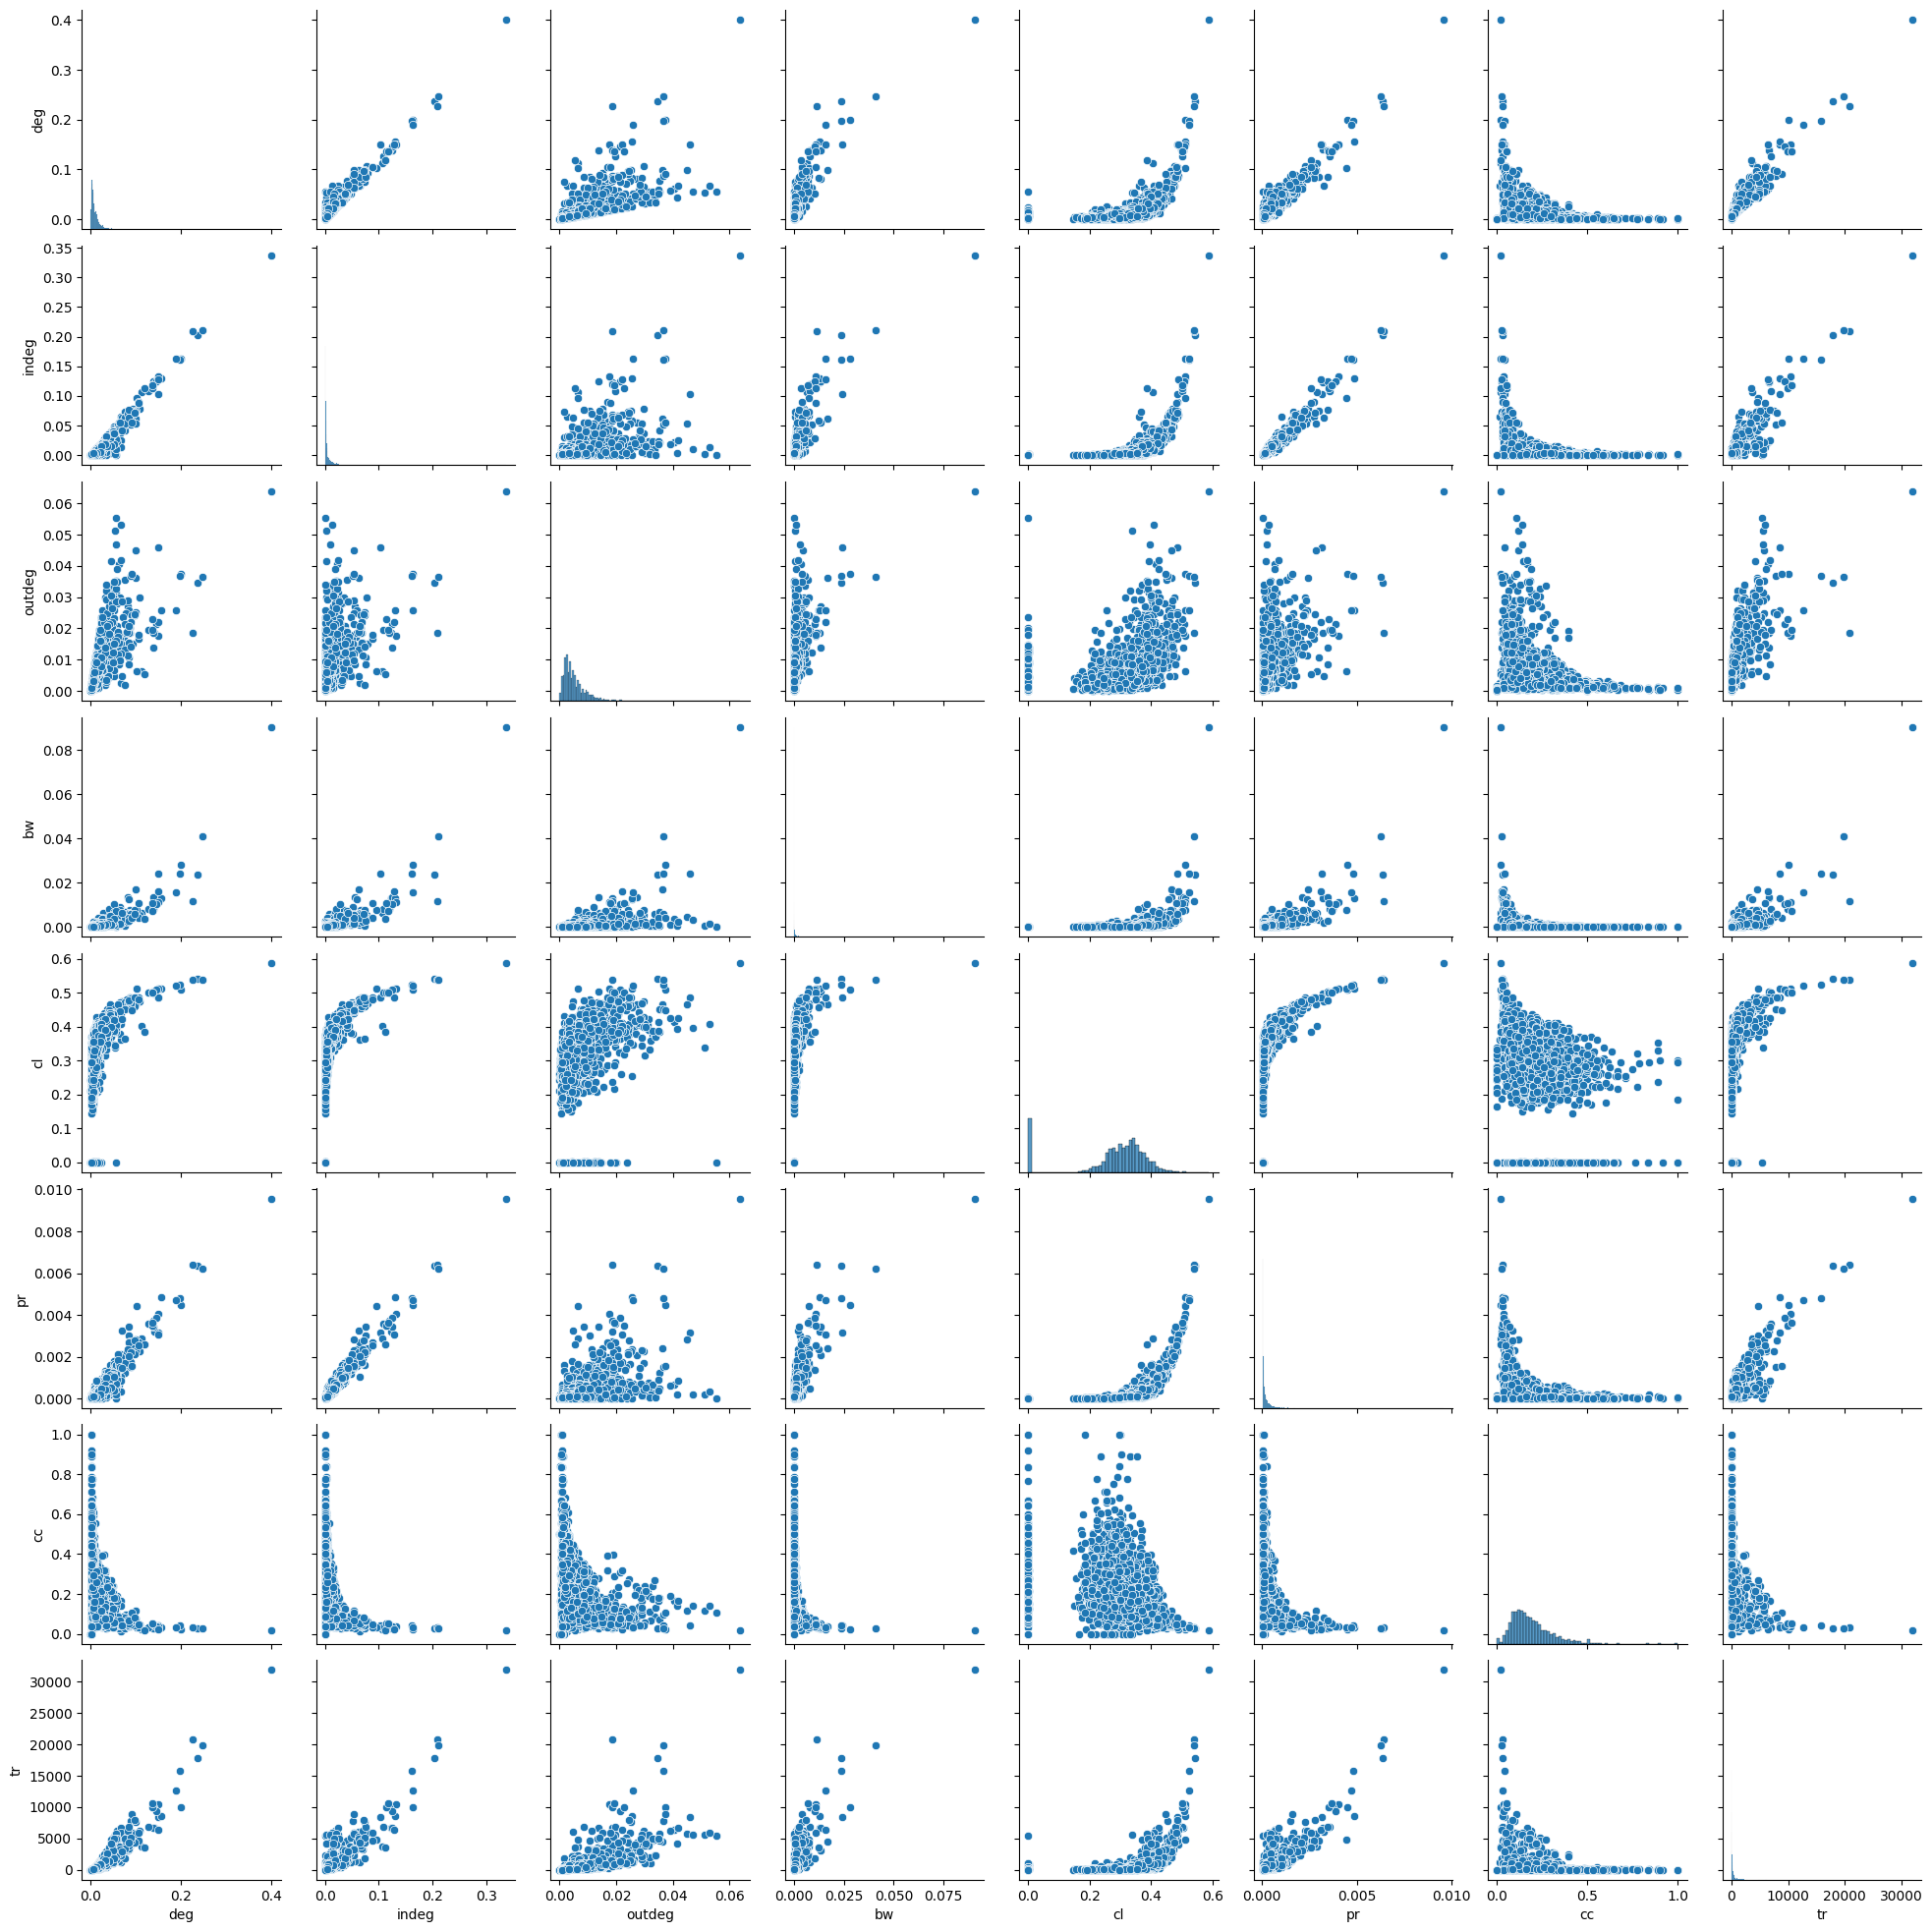

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([deg_arr, indeg_arr, outdeg_arr, betweenness_arr, closeness_arr, pagerank_arr, clustering_arr, triangles_arr]).T
df = pd.DataFrame(a, columns=['deg','indeg','outdeg','bw','cl','pr','cc','tr'])
sns.pairplot(df)
plt.show()